# Machine Learning

### https://present5.com/advanced-artificial-intelligence-lecture-1-introduction-to-ai/

### https://archive.ics.uci.edu/ml/index.php - machine learning repository'si, popular veri kümelerini bulabilirsiniz.

In [4]:
# pandas ve numpy kütüphanesini çağırma
import numpy as np 
import pandas as pd

In [5]:
# Veriyi Okumak;
# veriyi excel dosyası olduğu için read_excel ile okuduk ve bir değişkenin içine atadık
# cinsiyeti, yaşı, eğitimi, mesleği, başlangıç maaşı, süre, önceki iş tecrübeleri
data = pd.read_excel("regressiondata.xls")

data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp
0,Male,43,15,Manager,57000,27000,98,144
1,Male,37,16,Clerical,40200,18750,98,36
2,Female,66,12,Clerical,21450,12000,98,381
3,Female,48,8,Clerical,21900,13200,98,190
4,Male,40,15,Clerical,45000,21000,98,138


In [16]:
data.describe().T
# veriyi tanımak
# yaşların toplamı 474 ve hepsi 474 gözüküyor, missing data yok demekki 
# örneğin bağımsız değişkenlerden yaşa baktığımız zaman sola yığıldığını yani 25 ile 35 yaşında daha çok veri olduğunu görebiliriz

,count,mean,std,min,25%,50%,75%,max
age,474.0,38.675105,11.771788,24.0,30.00,33.5,47.00,66.0
educ,474.0,13.491561,2.884846,8.0,12.00,12.0,15.00,21.0
salary,474.0,34419.567511,17075.661465,15750.0,24000.00,28875.0,36937.50,135000.0
salbegin,474.0,17016.086498,7870.638154,9000.0,12487.50,15000.0,17490.00,79980.0
jobtime,474.0,81.109705,10.060945,63.0,72.00,81.0,90.00,98.0
prevexp,474.0,95.886076,104.564433,0.0,19.25,55.0,138.75,476.0


## Basit Doğrusal Regresyon 
### 𝑌=𝛽0+𝛽1𝑋𝑙

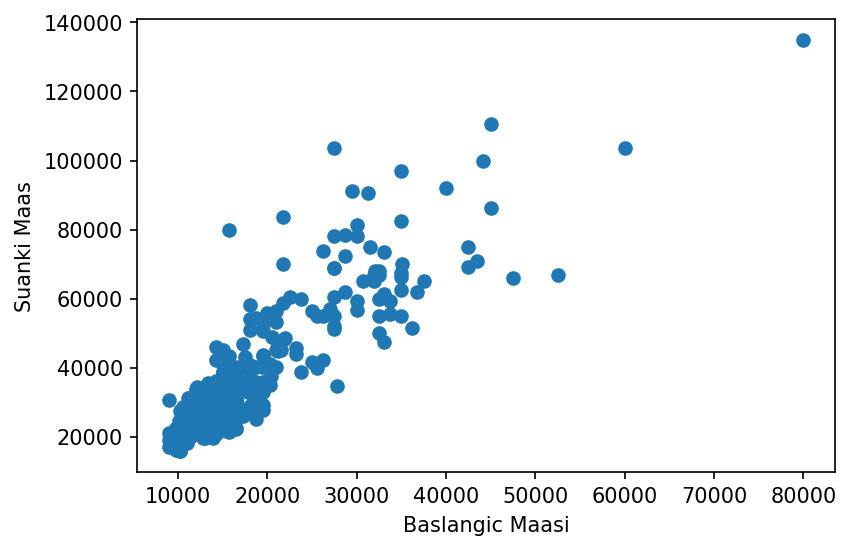

In [21]:
# Veriyi görselleştirmek
# X değişkeni olarak baslangic maasini, y değişkeni olarak ise şuanki maaşı seçtik
# pozitif bir korelasyon olduğunu söyleyebilirsiniz
# İlişkinin tam olarak linear olmayabilir ama biz öyle varsayacağız
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.scatter(data["salbegin"], data["salary"])
plt.xlabel("Baslangic Maasi")
plt.ylabel("Suanki Maas")
plt.show()

In [25]:
# Scikit-Learn ile Doğrusal Regresyon
# Kütüphaneyi çağırdık ve LinearRegression fonksiyonunu ya da predictor'ını çağırdık
# Siz genel olarak regresyon olsun classifier olsun aynı işleri yapacaksınız 
# Bir tane predictor object'i oluşturacaksınız ve daha sonra aldığınız bağımsız değişkenler ile modeli fit edeceksiniz
# O da size modeli train edecek ve ondan sonra prediction yapabileceksiniz
# Ana iş akışı bu şekilde diyebilirsiniz.
# tek bir feature ile çalışacağınız için başlangıç maaşlarını-salbegin alabilirsiniz
# y bağımslı değişkeni için maaş-salary aldık
# ve modeli fit ettikten sonra, başlangıç maaşının katsayısını-coefficient print fonksiyonu ile yazdırabilirsiniz
# intercept-regresyon sabitidir, zaman zaman bias'da denilebilir 

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

feature= ["salbegin"]
x = data[feature]
y = data["salary"]

model = LR.fit(x,y)

print("coefficient :", *model.coef_)
print("intercept :", model.intercept_)

coefficient : 1.9094497290679824
intercept : 1928.2057573545462


In [26]:
# Sonucun yorumlanması 
# LR içinde katsayıları scikit-learn tutuyor, siz sadece predict fonksiyonunu çağırmalısınız
# Eğer yeni salbegin-başlangıç maaşı ile birileri eklenirsa veri kümesine
# 20.000, 25.000, 30.000 için maaşları inceleyebilirsiniz
# önce bunları np.array'e atmalısınız 
# daha sonra siz reshape yapmalısınız, çünkü predict objeect'leri 2 dimension'lı-boyutlu istiyor
# 3,1'lik bir array'e dönüştüğünü görebilirsiniz
# artık sadece x değerlerini verip modeli predict edebilirsiniz 

yeni_salbegin = np.array([20000, 25000, 30000])

yeni_salbegin = yeni_salbegin.reshape(-1, 1)

tahmin = model.predict(yeni_salbegin)

print("Tahmin edilen maas 20.000:", tahmin[0])
print("Tahmin edilen maas 25.000:", tahmin[1])
print("Tahmin edilen maas 30.000:", tahmin[2])




Tahmin edilen maas 20.000: 40117.200338714196
Tahmin edilen maas 25.000: 49664.44898405411
Tahmin edilen maas 30.000: 59211.69762939402


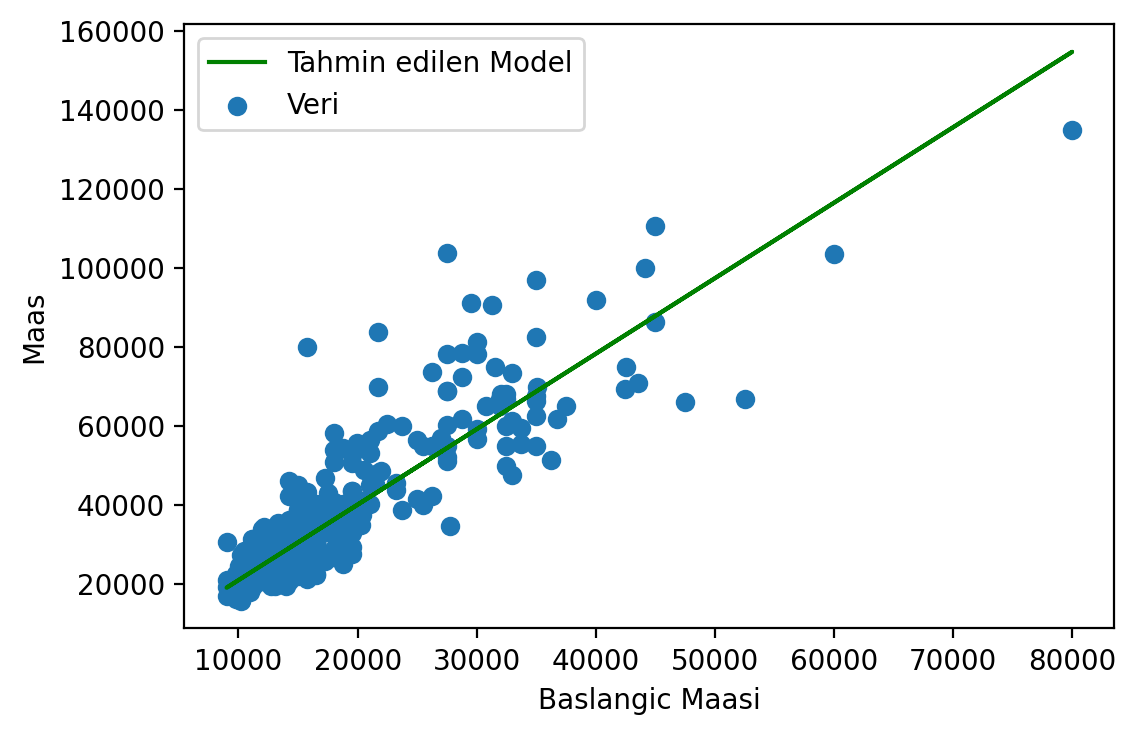

In [27]:
# Modeli görselleştirmek
# x değeri için tahmin değerlerini oluşturacaksınız
# linear bir model fit etmiş olacaksınız
# sonuçta biz %100 başarı ile fit etmek istemiyoruz, genel trendi yakalamak istiyoruz

y_tahmin = model.predict(x)

plt.figure(dpi=200)
plt.scatter(data["salbegin"], data["salary"])
plt.plot(x, y_tahmin, color="g" )

plt.xlabel("Baslangic Maasi")
plt.ylabel("Maas")
plt.legend(["Tahmin edilen Model", "Veri"])
plt.show()